<a href="https://colab.research.google.com/github/wlans01/2021_cphys2/blob/main/final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Image classification with CNN
- cnn을 이용하여 다음 이미지를 분류하여라.
- 인풋 데이터는 rgb 정보를 가지고 있다.
- 코드, 결과, 보고서를 함께 제출하여야 한다.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
batch_size = 4

#이미지의 범위를 [0,1]에서 [-1,1] 로 정규화시키기
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


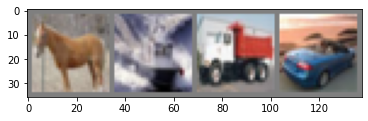

horse  ship truck automobile


In [4]:
# 이미지 보여주는 함수
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# train_loader의 랜덤 이미지 가져오기
dataiter = iter(train_loader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 라벨보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [5]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.pool = nn.MaxPool2d(2, 2, 1)
        self.fc1 = nn.Linear(128 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 10)
        self.dropout1 = nn.Dropout(p=0.5, inplace=False)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x



model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
)


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(100):  # Epoch 정하기

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # 데이터 가져오기 [inputs, labels]
        inputs, labels = data

        # 옴티마이져 초기화
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # 상황보여주기
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.297
[1,  6000] loss: 2.085
[1,  8000] loss: 1.930
[1, 10000] loss: 1.829
[1, 12000] loss: 1.717
[2,  2000] loss: 1.621
[2,  4000] loss: 1.542
[2,  6000] loss: 1.480
[2,  8000] loss: 1.419
[2, 10000] loss: 1.378
[2, 12000] loss: 1.333
[3,  2000] loss: 1.267
[3,  4000] loss: 1.246
[3,  6000] loss: 1.198
[3,  8000] loss: 1.226
[3, 10000] loss: 1.157
[3, 12000] loss: 1.169
[4,  2000] loss: 1.103
[4,  4000] loss: 1.091
[4,  6000] loss: 1.065
[4,  8000] loss: 1.065
[4, 10000] loss: 1.057
[4, 12000] loss: 1.025
[5,  2000] loss: 0.968
[5,  4000] loss: 0.975
[5,  6000] loss: 0.981
[5,  8000] loss: 0.955
[5, 10000] loss: 0.947
[5, 12000] loss: 0.969
[6,  2000] loss: 0.889
[6,  4000] loss: 0.900
[6,  6000] loss: 0.891
[6,  8000] loss: 0.893
[6, 10000] loss: 0.888
[6, 12000] loss: 0.871
[7,  2000] loss: 0.828
[7,  4000] loss: 0.831
[7,  6000] loss: 0.838
[7,  8000] loss: 0.845
[7, 10000] loss: 0.802
[7, 12000] loss: 0.849
[8,  2000] loss: 0.768
[8,  4000] 

In [10]:
correct = 0
total = 0
# 그래디언트 가 필요없으므로 그대로 예측하기
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # 결과 출력
        outputs = model(images)
        # 가장 높은 클래스를 출력값으로 설정
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


In [11]:
# 클래스별 카운트
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 그래디언트 가 필요없으므로 그대로 예측하기
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # 클래스별 정확도
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 클래스별 정확도 표시
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 69.5 %
Accuracy for class automobile is: 88.0 %
Accuracy for class bird  is: 65.0 %
Accuracy for class cat   is: 55.8 %
Accuracy for class deer  is: 64.0 %
Accuracy for class dog   is: 65.0 %
Accuracy for class frog  is: 82.6 %
Accuracy for class horse is: 77.4 %
Accuracy for class ship  is: 88.2 %
Accuracy for class truck is: 82.9 %


이번에 시용용한 데이터 셋은 CIFAR10 다음과 같은 특징이 있다.
  - rgb의 생상 채널을 가짐
  - 32*32 크기의 이미지
  - 10개의 서로다른 클래스가 있음  

즉 이미지의 크기는 3x32x32로, 이는 32x32 픽셀 크기의 이미지가 3개 채널(channel)의 색상로 이뤄져 있다는 것을 뜻한다.

이를 분류하기 위해서 합성곱 신경망(Convolution Neural Network)을 정의 하여사용하였고 모델은 다음과 같다.
```
Using cpu device
NeuralNetwork(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
)
```

처음 2개의 convolutional layer와 fully connected layer를 이용하여 훈련을 하였을때는 정확도가 너무 낮게 나와서 
추가로 convolutional layer와 fully connected layer를 넣었고 과적합을 방지하기위해 Dropout을 추가로 넣었다.



로스함수는 CrossEntropyLoss를 이용하였고 옴티마이져는 SDG를 이용하였다.
100회의 Epoch로 훈련을 했을때 다음과 같은 결과가 나왔다.
```
Accuracy for class airplane is: 69.5 %
Accuracy for class automobile is: 88.0 %
Accuracy for class bird  is: 65.0 %
Accuracy for class cat   is: 55.8 %
Accuracy for class deer  is: 64.0 %
Accuracy for class dog   is: 65.0 %
Accuracy for class frog  is: 82.6 %
Accuracy for class horse is: 77.4 %
Accuracy for class ship  is: 88.2 %
Accuracy for class truck is: 82.9 %
```
가장 높게 나온 클래스는 ship 이고 가장 낮게 나온 클래스는 cat 이다.